# AG_News 데이터셋
> **AG's News Topic Classification Dataset**   

- 뉴스 기사 제목 + 본문의 일부 => **4가지 주제 중 하나로 분류**하는 Multi-Class Classification task   
- NLP 분야에서 유명한 뉴스 기사 분류 데이터셋

### 구성 정보

|항목|	내용|
|:---|:---|
|총 샘플 수|	약 120,000개 (train), 7,600개 (test)
|입력(Input)|	`text`: 뉴스 제목 + 본문 요약
|정답(Label)|	`label`: 0~3 사이 정수 (4개 카테고리)

<br>

### 클래스(Label) 정보
|Label|	카테고리|
|:---|:---|
|0|	World
|1|	Sports
|2|	Business
|3|	Sci/Tech

``` python
# 예시 샘플
{
  "text": "Wall St. Bears Claw Back Into the Black (Reuters)",
  "label": 2  # Business
}
```

In [ ]:
!pip install datasets

In [2]:
from datasets import load_dataset

**AG_News 데이터셋 확인**

In [32]:
train_ds = load_dataset("fancyzhx/ag_news", split="train[10%:15%]")
test_ds = load_dataset("fancyzhx/ag_news", split="test[10%:15%]")

label 변환 함수

In [33]:
def label_check(ag_label):
  return {
      0: lambda: 'World',
      1: lambda: 'Sports',
      2: lambda: 'Business',
      3: lambda: 'Sci/Tech'
  }.get(ag_label, lambda: "잘못된 label 입니다")()

print(label_check(3))

Sci/Tech


데이터셋 10개 샘플링

```
[label]
- text
```

In [34]:
for i in range(10):
  print(f'[{label_check(train_ds[i]["label"])}]\n- {train_ds[i]["text"]}')

[Sci/Tech]
- RocketInfo Partners with Canadian Press, Helps Nascar RocketInfo Partners with Canadian Press, Helps Nascar\\Rocketinfo Inc., news search engine announced yesterday that it has formed a key reseller alliance with the Canadian Press (CP), one of the top-rated multimedia news agencies in the world. CP plans to expand their media monitoring services by offering clients access to the ...
[Business]
- Oil Rebounds After Iraq Pipeline Attack Oil prices rose on Friday as a sabotage attack on Iraqi oil infrastructure reignited concern about the reliability of crude exports from the country despite a peace deal to end an uprising in Najaf.
[Business]
- US Second-Quarter GDP Downgraded The US economy grew more slowly in the second quarter than first thought amid shrinking corporate profits and higher imports, the government said on Friday in a report 
[Business]
- Deutsche Bank Arm in Multi-Million Dollar Payout The brokerage unit of Deutsche Bank has voluntarily agreed to pay almos

데이터 통계 확인

In [35]:
import pandas as pd

In [49]:
df_train = pd.DataFrame(train_ds)
df_test = pd.DataFrame(test_ds)

print('[train] 데이터 label 분포\n')
print(df_train['label'].value_counts())
print('\n\n')
print('[test] 데이터 label 분포\n')
print(df_test['label'].value_counts())
print('\n\n')
# 텍스트 길이 분포 확인
print('[train] 데이터 text 길이 분포\n')
df_train['length'] = df_train['text'].apply(lambda x: len(x.split()))
print(df_train['length'].describe())

print('\n\n')

print('[test] 데이터 text 길이 분포\n')
df_test['length'] = df_test['text'].apply(lambda x: len(x.split()))
print(df_test['length'].describe())

[train] 데이터 label 분포

label
0    1621
3    1601
1    1544
2    1234
Name: count, dtype: int64



[test] 데이터 label 분포

label
0    101
1    100
3     97
2     82
Name: count, dtype: int64



[train] 데이터 text 길이 분포

count    6000.000000
mean       38.045500
std        10.995904
min        11.000000
25%        31.000000
50%        37.000000
75%        43.000000
max       144.000000
Name: length, dtype: float64



[test] 데이터 text 길이 분포

count    380.000000
mean      37.797368
std       10.110132
min       13.000000
25%       32.000000
50%       37.000000
75%       43.000000
max      115.000000
Name: length, dtype: float64


데이터 시각화
- label 분포도

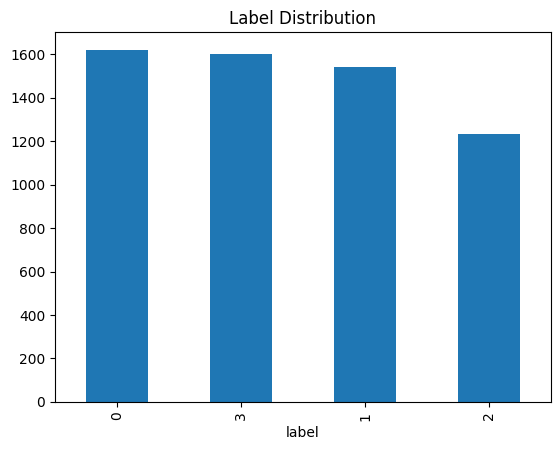

In [53]:
import matplotlib.pyplot as plt

df_train['label'].value_counts().plot(kind="bar")
plt.title("Label Distribution")
plt.show()